## Análisis Exploratorio

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar CSVs corregidos
df1 = pd.read_csv("import_2024.csv", parse_dates=["Fecha"])
df2 = pd.read_csv("import_2025.csv", parse_dates=["Fecha"])
df = pd.concat([df1, df2], ignore_index=True)

# Asegurar que la columna "Fecha" esté en formato datetime
df["Fecha"] = pd.to_datetime(df["Fecha"], errors="coerce")

# Verifica si hubo problemas de conversión
if df["Fecha"].isnull().any():
    print("⚠️ Advertencia: Algunas fechas no se pudieron convertir.")

df["Año"] = df["Fecha"].dt.year
df["Mes"] = df["Fecha"].dt.month

print("Columnas disponibles:")
print(df.columns.tolist())

# Seleccionamos columnas de interés
columnas_relevantes = [
    "Fecha",
    "Año",
    "Mes",
    "Gasolina regular",
    "Gasolina superior",
    "Diesel bajo azufre",
    "Diesel ultra bajo azufre",
    "Diesel alto azufre",
    "Gas licuado de petróleo"
]

df_filtrado = df[columnas_relevantes].copy()

# Normalizamos el nombre del diésel
df_filtrado["Diesel_total"] = (
    df_filtrado[["Diesel bajo azufre", "Diesel ultra bajo azufre", "Diesel alto azufre"]].sum(axis=1)
)

# --- Seleccionamos las columnas relevantes ---
combustibles = ['Gasolina regular', 'Gasolina superior', 'Diesel_total', 'Gas licuado de petróleo']

print(df_filtrado[combustibles].describe())

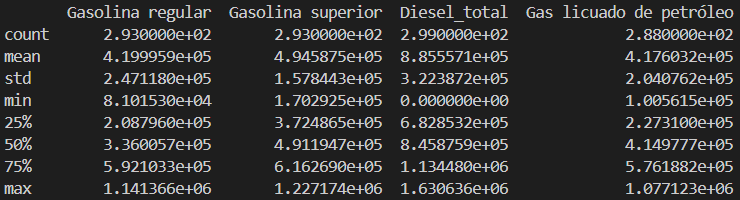

### Importación de gasolina por mes

In [ ]:
# 1. Tendencia general
df_filtrado.set_index("Fecha")[["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]].plot(figsize=(12, 6))
plt.title("Importación mensual por tipo de combustible")
plt.ylabel("Barriles")
plt.grid(True)
plt.tight_layout()
plt.show()

# Mes con más importación por tipo
for col in ["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]:
    max_row = df_filtrado.loc[df_filtrado[col].idxmax()]
    print(f"Máximo de {col}: {max_row[col]:,.0f} en {max_row['Fecha'].date()}")

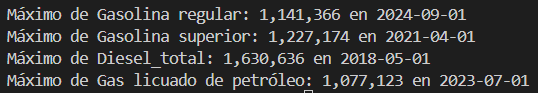

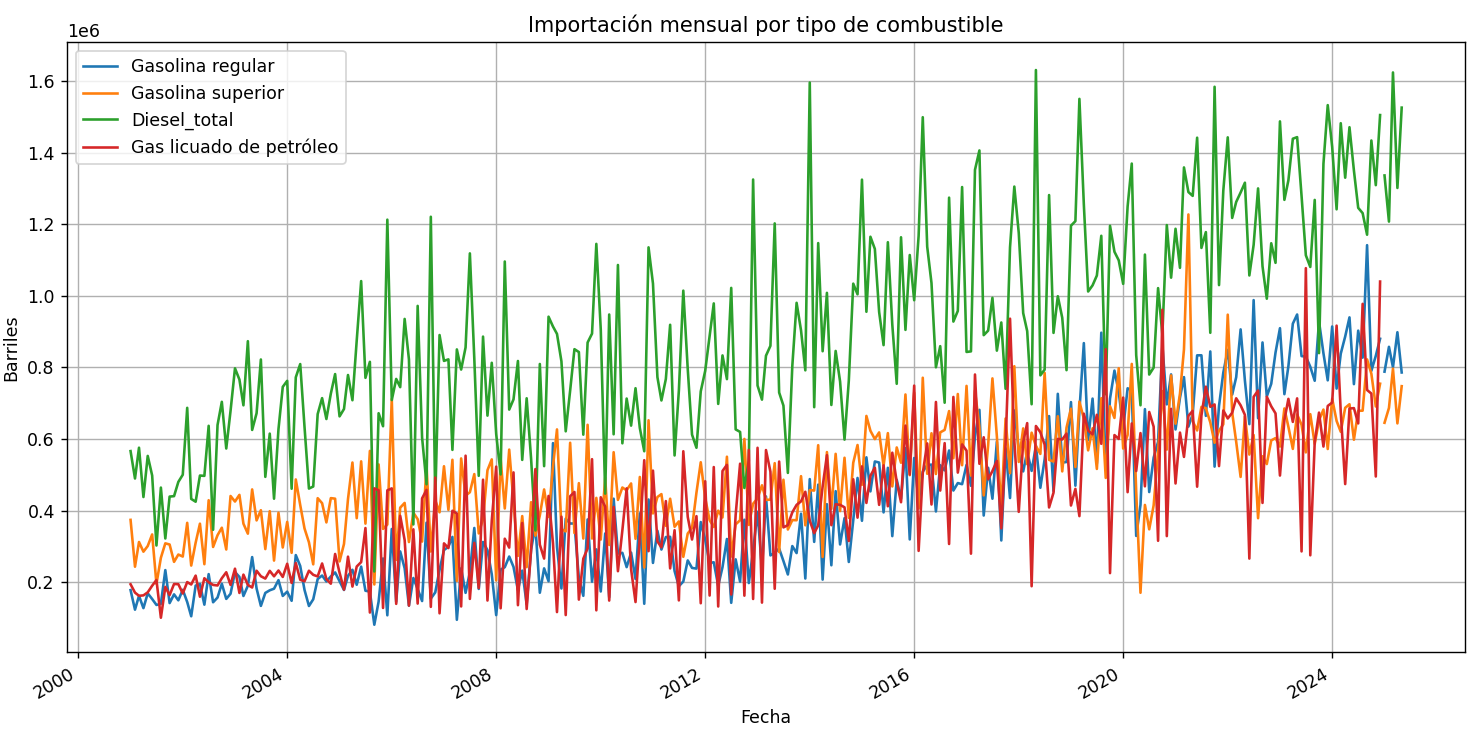

### Picos en importaciones por año

In [ ]:
for col in combustibles:
    plt.figure(figsize=(10, 4))
    sns.lineplot(data=df_filtrado, x="Año", y=col)
    plt.title(f"Picos anuales de importación: {col}")
    plt.ylabel("Volumen")
    plt.show()

# 2. Promedios anuales
df_anual = df_filtrado.groupby("Año")[["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]].sum()
df_anual.plot(kind="bar", figsize=(12, 6))
plt.title("Importación anual por tipo de combustible")
plt.ylabel("Barriles")
plt.grid(True)
plt.tight_layout()
plt.show()

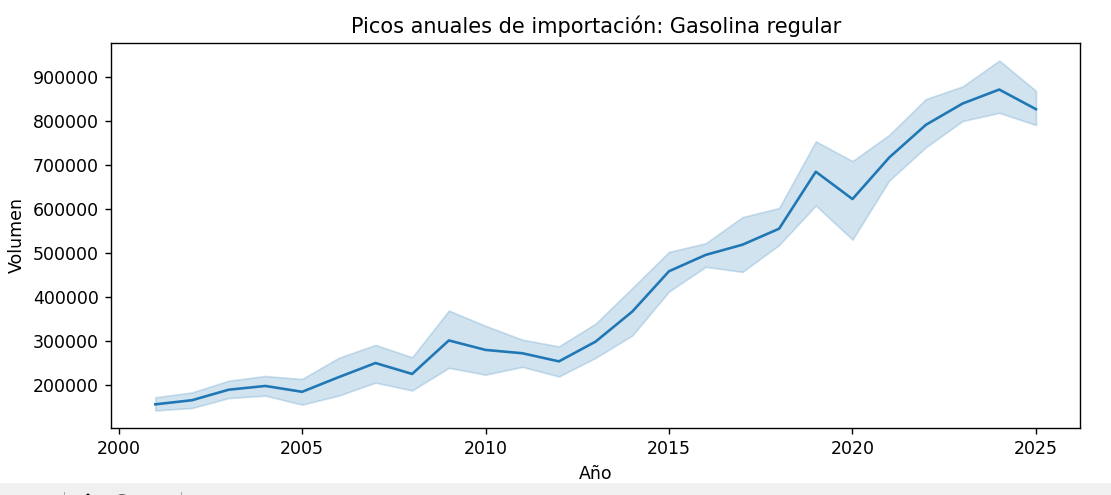
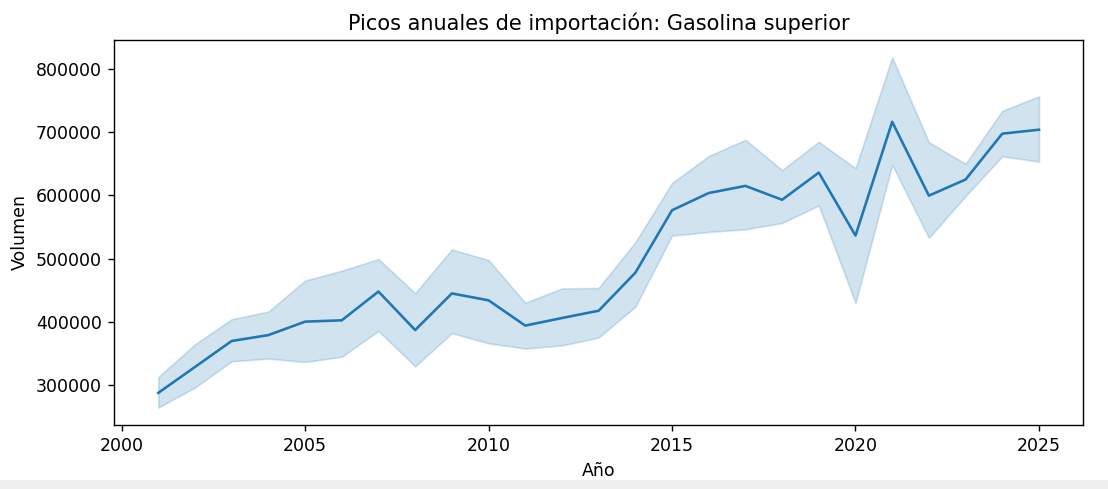
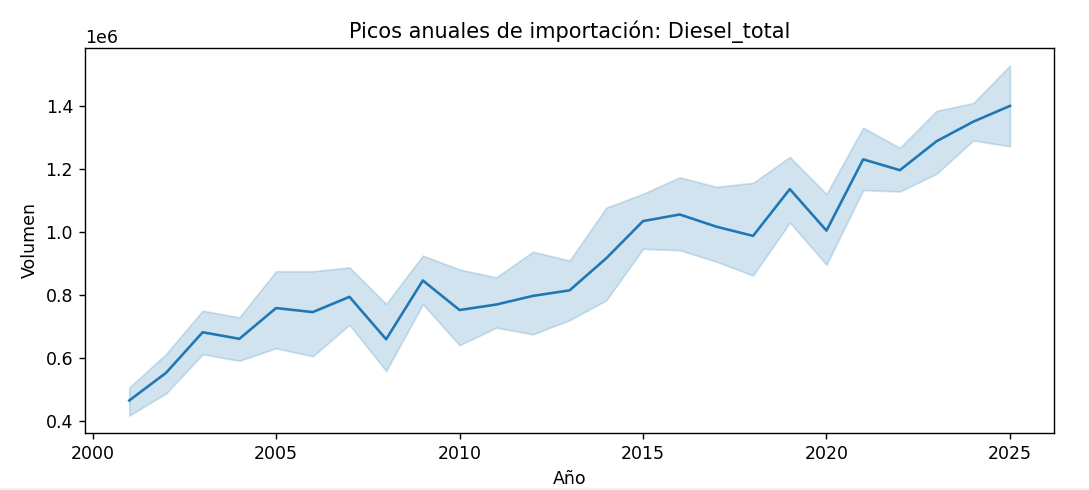
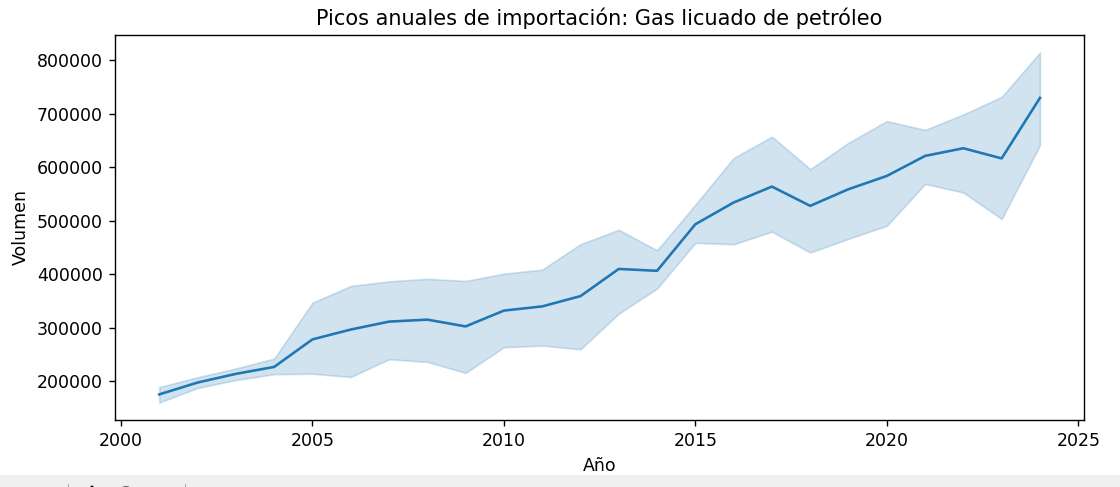

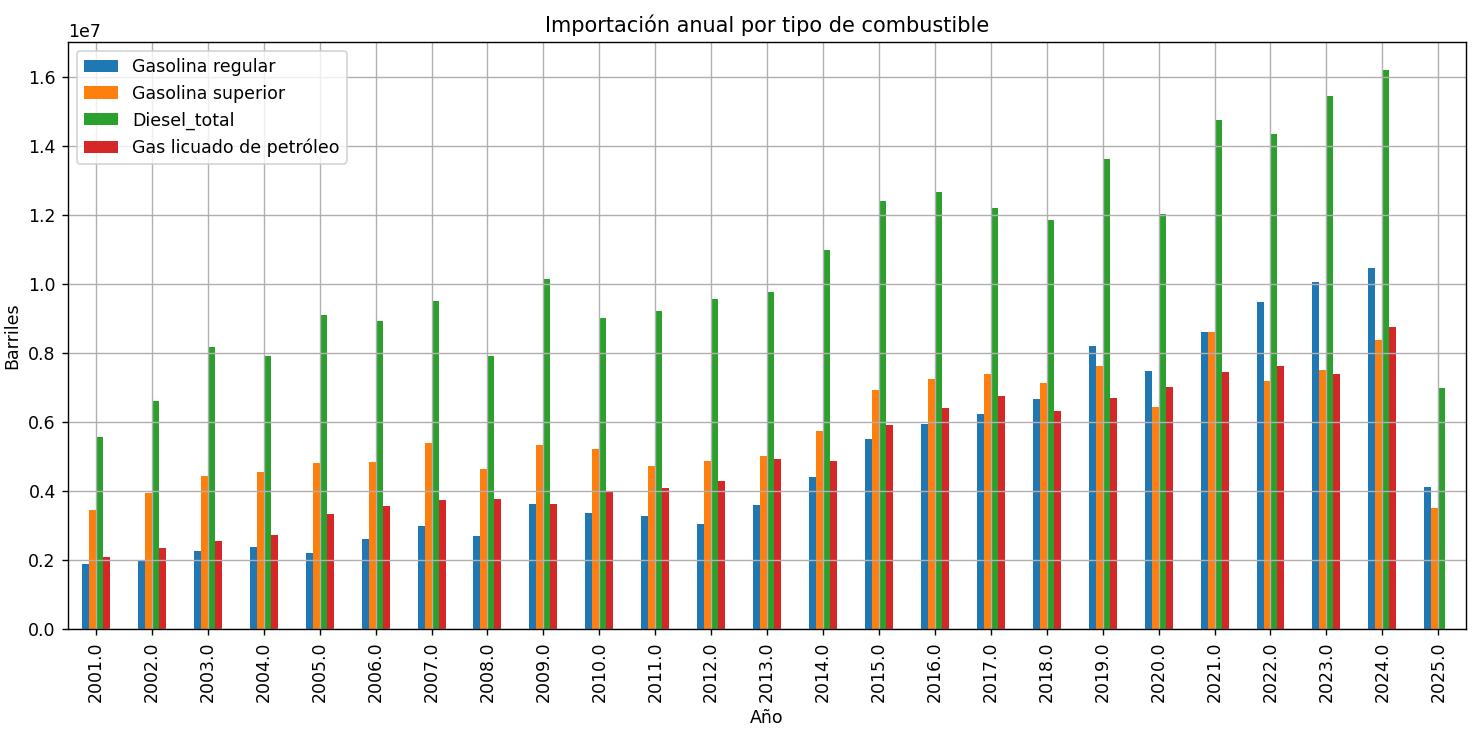

### Comportamiento en últimos años

In [ ]:
x = 5
últimos_años = sorted(df["Año"].unique())[-x:]
df_ultimos = df_filtrado[df["Año"].isin(últimos_años)]

plt.figure(figsize=(10, 5))
for col in combustibles:
    sns.lineplot(data=df_ultimos, x="Fecha", y=col, label=col)

plt.title(f"Comportamiento de importaciones en los últimos {x} años")
plt.ylabel("Volumen")
plt.legend()
plt.show()

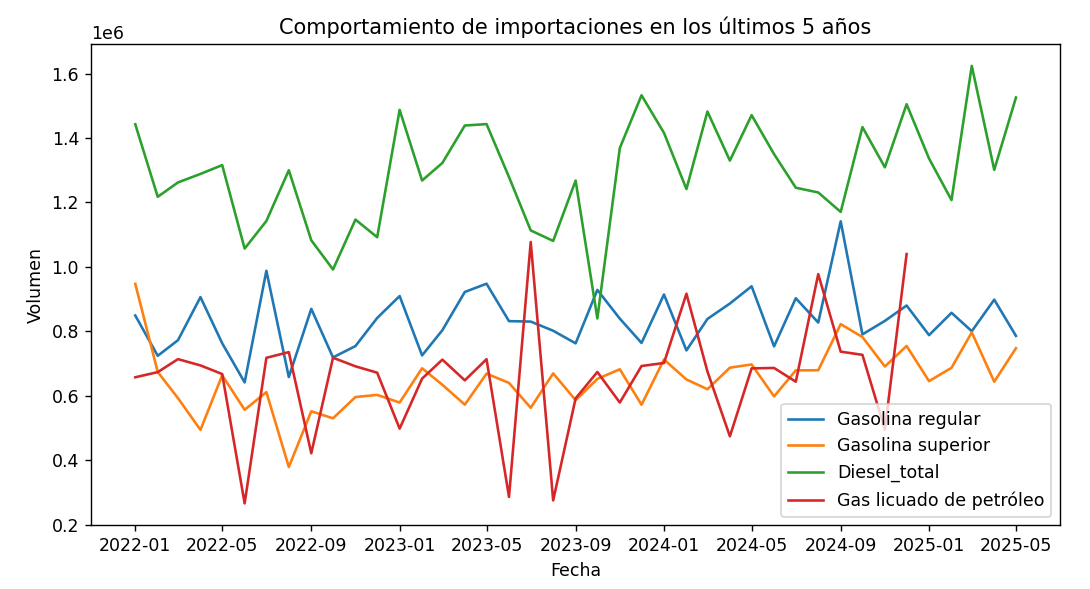

### Comportamiento en pandemia

In [ ]:
pandemia = df_filtrado[df_filtrado["Año"].between(2020, 2021)]
pandemia.set_index("Fecha")[["Gasolina regular", "Gasolina superior", "Diesel_total", "Gas licuado de petróleo"]].plot(figsize=(12, 5))
plt.title("Comportamiento durante pandemia (2020–2021)")
plt.ylabel("Barriles")
plt.grid(True)
plt.tight_layout()
plt.show()

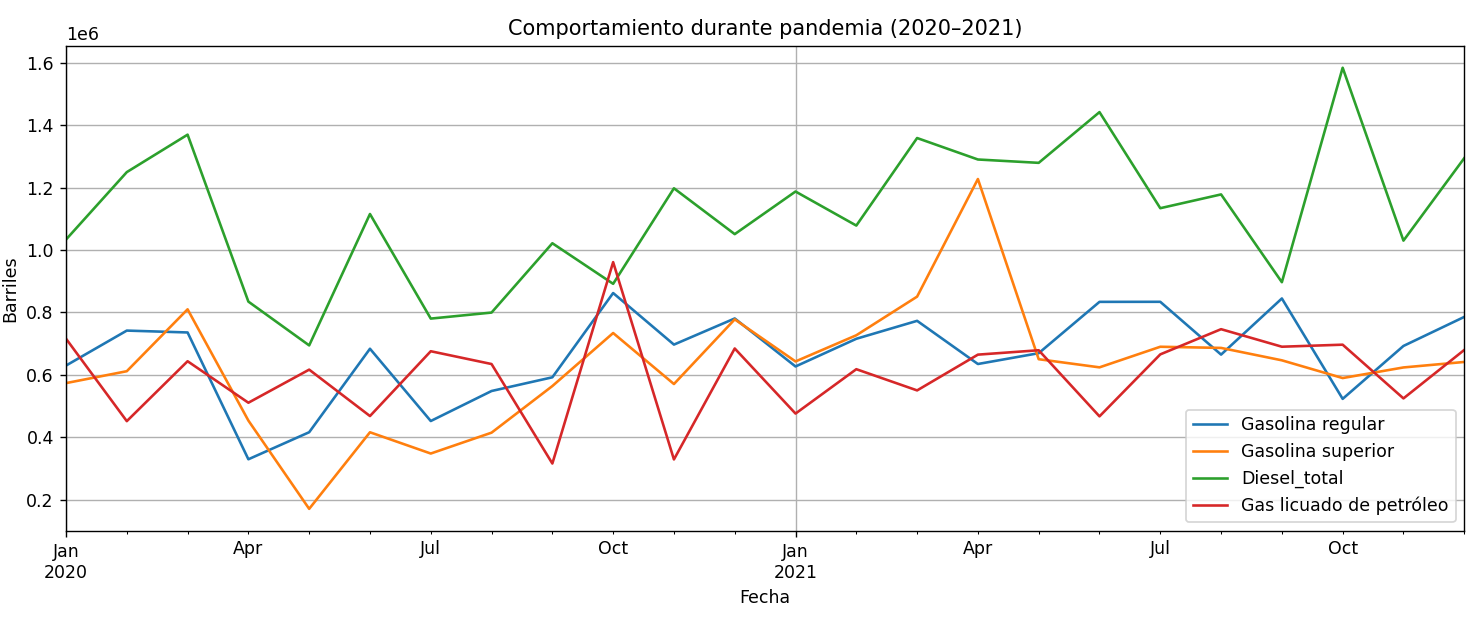

# Importacion Librerias

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.seasonal     import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools    import adfuller
from statsmodels.tsa.holtwinters  import ExponentialSmoothing
from statsmodels.tsa.arima.model  import ARIMA

from prophet       import Prophet
from sklearn.neural_network import MLPRegressor


c:\Users\dolan\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


# Lectura de bases de datos 

In [ ]:

# 2025
df_precios2025 = pd.read_csv(
    "PRECIOS-2025-01.csv",
    sep=";",
    encoding="latin1",
    thousands=",",
    decimal=".",
    engine="python"
)
print("=== PRECIOS-2025-01.csv ===")
print("Shape:", df_precios2025.shape)
print(df_precios2025.dtypes)
print(df_precios2025.head(), "\n")

# 2024
df_precios2024 = pd.read_csv(
    "PRECIOS-2024-01.csv",
    sep=";",
    encoding="latin1",
    thousands=",",
    decimal=".",
    engine="python"
)
print("=== PRECIOS-2024-01.csv ===")
print("Shape:", df_precios2024.shape)
print(df_precios2024.dtypes)
print(df_precios2024.head(), "\n")

# 2023
df_precios2023 = pd.read_csv(
    "PRECIOS-2023-01.csv",
    sep=";",
    encoding="latin1",
    thousands=",",
    decimal=".",
    engine="python"
)
print("=== PRECIOS-2023-01.csv ===")
print("Shape:", df_precios2023.shape)
print(df_precios2023.dtypes)
print(df_precios2023.head(), "\n")

# 2022
df_precios2022 = pd.read_csv(
    "PRECIOS-2022-01.csv",
    sep=";",
    encoding="latin1",
    thousands=",",
    decimal=".",
    engine="python"
)
print("=== PRECIOS-2022-01.csv ===")
print("Shape:", df_precios2022.shape)
print(df_precios2022.dtypes)
print(df_precios2022.head(), "\n")

# 2021
df_precios2021 = pd.read_csv(
    "PRECIOS-2021-01.csv",
    sep=";",
    encoding="latin1",
    thousands=",",
    decimal=".",
    engine="python"
)
print("=== PRECIOS-2021-01.csv ===")
print("Shape:", df_precios2021.shape)
print(df_precios2021.dtypes)
print(df_precios2021.head(), "\n")


df_imp_2024 = pd.read_csv(
    "IMPORTACION-2024-12.csv",
    sep=";",               
    encoding="latin1",     
    thousands=",",         
    decimal=".",           
    engine="python"        
)
df_imp_2025 =pd.read_csv(
    "IMPORTACION-2025-05.csv",
    sep=";",               
    encoding="latin1",     
    thousands=",",         
    decimal=".",           
    engine="python"        
)


print("=== IMPORTACION-2024-12.csv ===")
print("Shape:", df_imp_2024.shape)
print(df_imp_2024.dtypes)
print(df_imp_2024.head(), "\n")

print("=== IMPORTACION-2025-05.csv ===")
print("Shape:", df_imp_2025.shape)
print(df_imp_2025.dtypes)
print(df_imp_2025.head(), "\n")

df_consumo_2024 = pd.read_csv(
    "CONSUMO-2024-12.csv",
    sep=";",               
    encoding="latin1",     
    thousands=",",         
    decimal=".",           
    engine="python"        
)
df_consumo_2025 = pd.read_csv(
    "VENTAS-2025-05.csv",
    sep=";",               
    encoding="latin1",     
    thousands=",",         
    decimal=".",           
    engine="python"        
)
print("=== CONSUMO-2024-12.csv ===")
print("Shape:", df_consumo_2024.shape)
print(df_consumo_2024.dtypes)
print(df_consumo_2024.head(), "\n")

print("=== VENTAS-2025-05.csv ===")
print("Shape:", df_consumo_2025.shape)
print(df_consumo_2025.dtypes)
print(df_consumo_2025.head(), "\n")


=== PRECIOS-2025-01.csv ===
Shape: (195, 8)
FECHA                  object
Tipo de Cambio         object
Superior               object
Regular                object
Diesel                 object
Bunker                 object
Glp Cilindro 25Lbs.    object
Unnamed: 7             object
dtype: object
         FECHA Tipo de Cambio   Superior    Regular     Diesel     Bunker  \
0          NaN        GTQ/USD  GTQ/GALON  GTQ/GALON  GTQ/GALON  GTQ/GALON   
1  01/ene/2025        7.70625     28.95      27.45      25.47      18.74    
2  02/ene/2025        7.70740     28.95      27.45      25.47      18.74    
3  03/ene/2025        7.70971     28.95      27.45      25.47      18.74    
4  04/ene/2025        7.70971     28.95      27.45      25.47      18.74    

  Glp Cilindro 25Lbs. Unnamed: 7  
0       GTQ/CIL 25 LB     GTQ/LB  
1             110.00       4.40   
2             110.00       4.40   
3             110.00       4.40   
4             110.00       4.40    

=== PRECIOS-2024-01.csv ===

#  Concatenar y limpiar todas las tablas de PRECIOS

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from itertools import product


df_precios = pd.concat([
    df_precios2021, df_precios2022, df_precios2023,
    df_precios2024, df_precios2025
], ignore_index=True)

month_map = {
    'ene':'01','feb':'02','mar':'03','abr':'04','may':'05','jun':'06',
    'jul':'07','ago':'08','sep':'09','oct':'10','nov':'11','dic':'12'
}

def parse_fecha_precio(x):
    if isinstance(x, str) and '/' in x:
        d, m, y = x.split('/')
        mm = month_map[m.lower()]
        return pd.to_datetime(f"{y}-{mm}-{d.zfill(2)}")
    return pd.NaT

df_precios = df_precios.iloc[1:].copy()  
df_precios['FECHA'] = df_precios['FECHA'].map(parse_fecha_precio)
df_precios = df_precios.dropna(subset=['FECHA']).reset_index(drop=True)
df_precios.set_index('FECHA', inplace=True)
for col in ['Superior','Regular','Diesel']:
    df_precios[col] = df_precios[col].astype(float)


# Concatenar y limpiar IMPORTACIÓN

In [33]:

df_imp = pd.concat([df_imp_2024, df_imp_2025], ignore_index=True)
def parse_fecha_mensual(x):
    if isinstance(x, str) and '/' in x:
        m, y = x.split('/')
        mm = month_map[m.lower()]
        return pd.to_datetime(f"{y}-{mm}-01")
    return pd.NaT

df_imp['Fecha'] = df_imp['Fecha'].map(parse_fecha_mensual)
df_imp = df_imp.dropna(subset=['Fecha']).reset_index(drop=True)
df_imp.set_index('Fecha', inplace=True)



# Concatenar y limpiar CONSUMO

In [34]:
df_cons = pd.concat([df_consumo_2024, df_consumo_2025], ignore_index=True)
df_cons['Fecha'] = df_cons['Fecha'].map(parse_fecha_mensual)
df_cons = df_cons.dropna(subset=['Fecha']).reset_index(drop=True)
df_cons.set_index('Fecha', inplace=True)

# Selección de las 3 series (“Regular”)

In [ ]:
series = {
    'Precios_Regular':    df_precios['Regular'],
    'Importacion_Regular': df_imp['Gasolina regular'],
    'Consumo_Regular':    df_cons['Gasolina regular']
}

s = series['Precios_Regular']

#  Inicio, fin y frecuencia

print("Precios_Regular: inicio =", s.index.min(), 
      "fin =", s.index.max(),
      "freq aparente =", pd.infer_freq(s.index))




Precios_Regular: inicio = 2021-01-01 00:00:00 fin = 2025-07-13 00:00:00 freq aparente = D


#  Gráfico de la serie

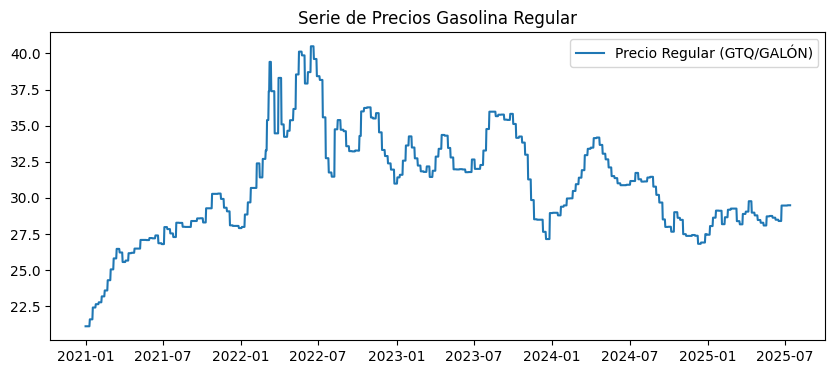

In [36]:
plt.figure(figsize=(10,4))
plt.plot(s, label='Precio Regular (GTQ/GALÓN)')
plt.title("Serie de Precios Gasolina Regular")
plt.legend()
plt.show()

# Descomposición


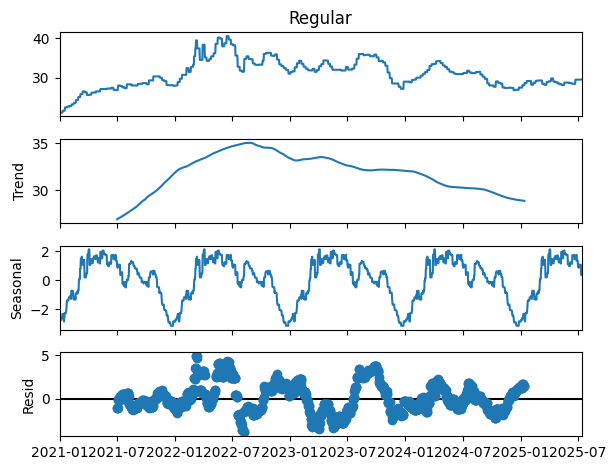

In [37]:
dec = seasonal_decompose(s, model='additive', period=365)  # daily, period=365
dec.plot()
plt.show()



# Transformación 

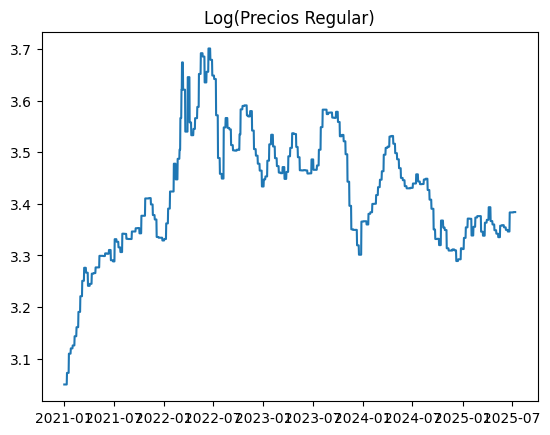

In [38]:

s_log = np.log(s)
plt.plot(s_log); plt.title("Log(Precios Regular)")
plt.show()


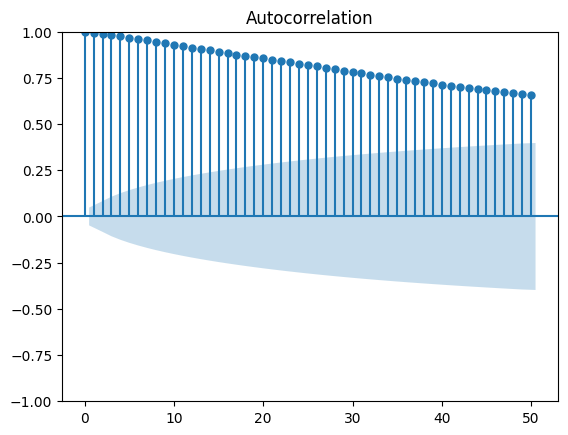

ADF stat = -2.801, p-val = 0.058


In [39]:

plot_acf(s, lags=50); plt.show()
adf_res = adfuller(s.dropna())
print("ADF stat = %.3f, p-val = %.3f" % (adf_res[0], adf_res[1]))

# Buscar p,d,q

In [ ]:

s_clean = s.dropna().astype(float)          
d = 1                                       
best_aic = np.inf
best_order = None

for p in range(4):                           
    for q in range(4):                       
        try:
            m = ARIMA(
                s_clean,
                order=(p, d, q),
                enforce_stationarity=False,
                enforce_invertibility=False
            ).fit()                         
            if m.aic < best_aic:
                best_aic = m.aic
                best_order = (p, d, q)
        except Exception:
            continue

print("Mejor ARIMA order =", best_order, " AIC =", best_aic)


Mejor ARIMA order = (2, 1, 2)  AIC = 981.7153981293288


# Ajuste de varios modelos y comparación

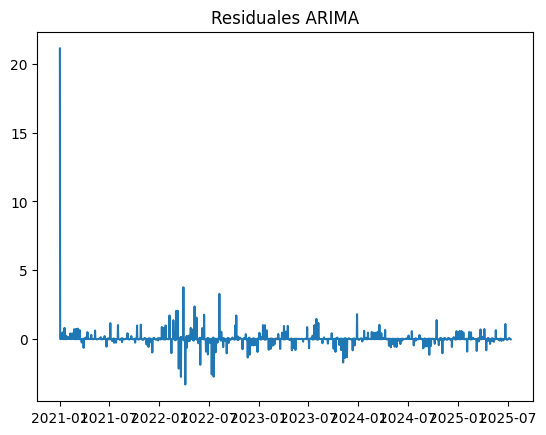

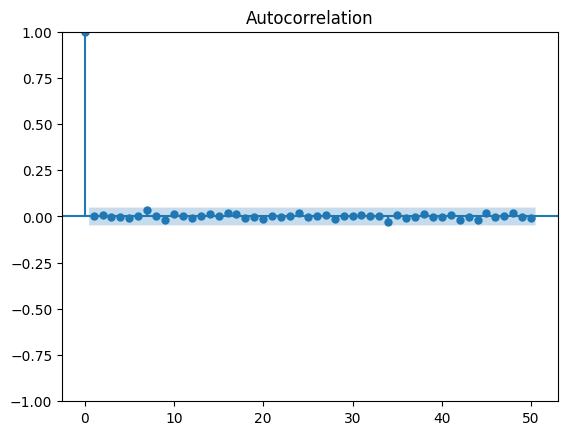

                               SARIMAX Results                                
Dep. Variable:                Regular   No. Observations:                 1655
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -482.860
Date:                Sun, 20 Jul 2025   AIC                            975.720
Time:                        22:29:47   BIC                           1002.775
Sample:                    01-01-2021   HQIC                           985.750
                         - 07-13-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7870      0.020     88.523      0.000       1.747       1.827
ar.L2         -0.9281      0.017    -53.523      0.000      -0.962      -0.894
ma.L1         -1.8107      0.015   -118.322      0.0

22:29:49 - cmdstanpy - INFO - Chain [1] start processing
22:29:49 - cmdstanpy - INFO - Chain [1] done processing


MSE ARIMA: 0.43901646343374157
MSE Prophet: 3.0588811487753267
MSE HoltWinters: 0.5748935535697126
MSE NN: 0.4233326846327133


In [44]:

from prophet import Prophet

model = ARIMA(s, order=best_order).fit()
res = model.resid
plt.figure(); plt.plot(res); plt.title("Residuales ARIMA"); plt.show()
plot_acf(res.dropna(), lags=50); plt.show()
print(model.summary())
df_prop = s.reset_index().rename(columns={'FECHA':'ds','Regular':'y'})
m_prop = Prophet(yearly_seasonality=True, daily_seasonality=False)
m_prop.fit(df_prop)
fut = m_prop.make_future_dataframe(periods=30, freq='D')
fc_prop = m_prop.predict(fut)

hw = ExponentialSmoothing(s, trend='add', seasonal='add', seasonal_periods=365).fit()
fc_hw = hw.forecast(30)

lags = 5
X, y = [], []
for i in range(lags, len(s)):
    X.append(s.values[i-lags:i])
    y.append(s.values[i])
X, y = np.array(X), np.array(y)
mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)
mlp.fit(X, y)
# Forecast iterativo
last_obs = s.values[-lags:].tolist()
fc_nn = []
for _ in range(30):
    pred = mlp.predict([last_obs[-lags:]])[0]
    fc_nn.append(pred)
    last_obs.append(pred)

true = s[-30:]
mse_arima = mean_squared_error(true, model.forecast(30))
mse_prop  = mean_squared_error(true, fc_prop.set_index('ds').yhat[-30:])
mse_hw    = mean_squared_error(true, fc_hw)
mse_nn    = mean_squared_error(true, fc_nn)

print("MSE ARIMA:", mse_arima)
print("MSE Prophet:", mse_prop)
print("MSE HoltWinters:", mse_hw)
print("MSE NN:", mse_nn)

# APLICARLO A LAS SERIES RESTANTES


ANÁLISIS DE SERIE: Importacion_Regular
a) Inicio = 2001-01-01 00:00:00   Fin = 2025-05-01 00:00:00   Freq aparente = MS


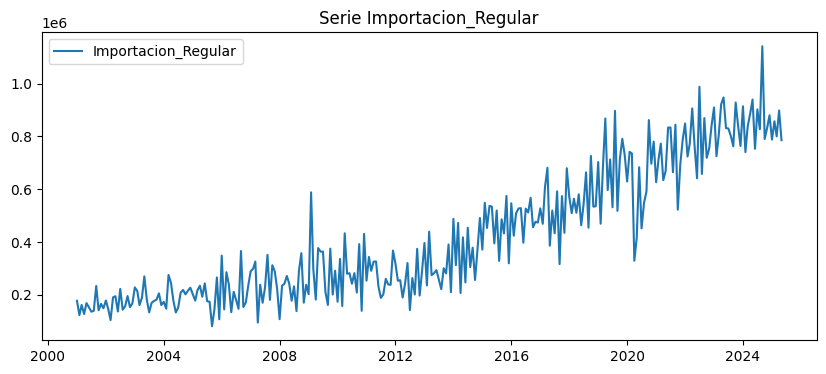

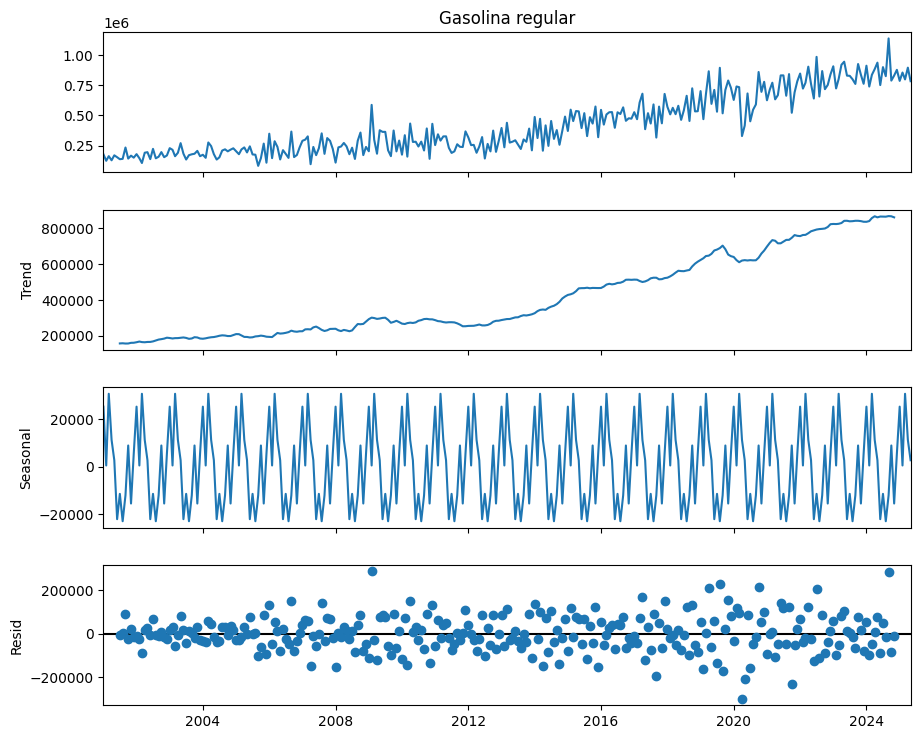

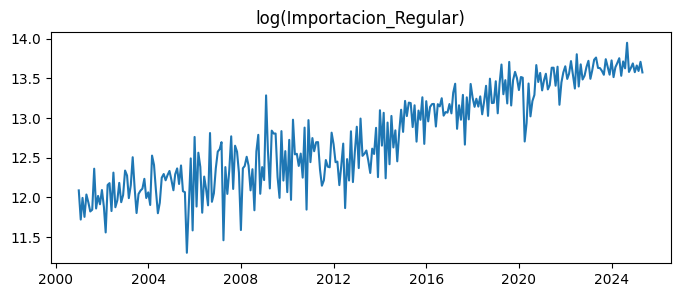

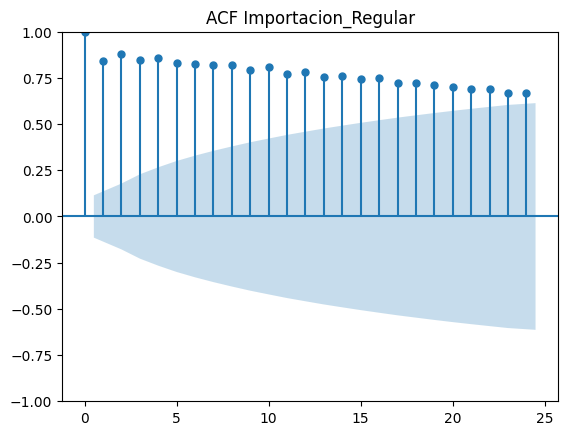

ADF stat=0.431, p-val=0.983
→ No estacionaria en media (d=1 sugerido)

f) Mejor ARIMA order = (1, 1, 3)  AIC = 7406.182353839256


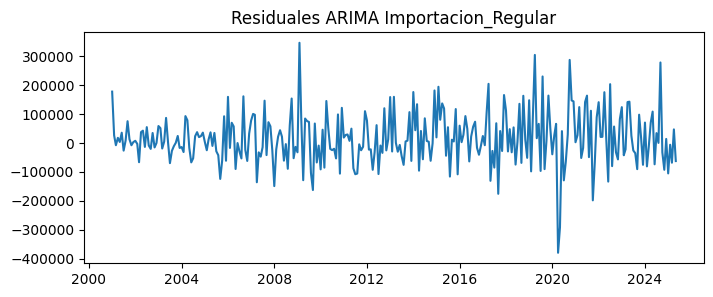

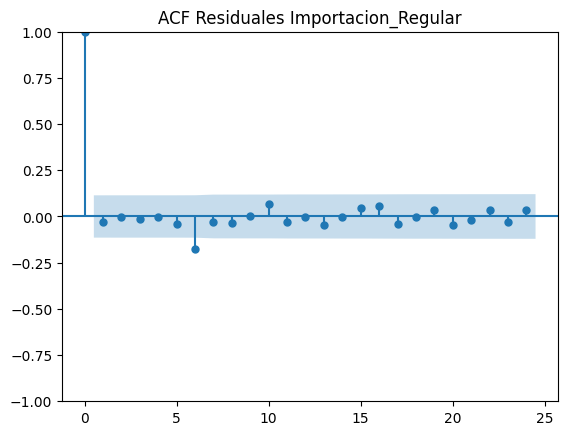

22:30:00 - cmdstanpy - INFO - Chain [1] start processing


                               SARIMAX Results                                
Dep. Variable:       Gasolina regular   No. Observations:                  293
Model:                 ARIMA(1, 1, 3)   Log Likelihood               -3698.091
Date:                Sun, 20 Jul 2025   AIC                           7406.182
Time:                        22:30:00   BIC                           7424.497
Sample:                    01-01-2001   HQIC                          7413.522
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.9119      0.092     -9.860      0.000      -1.093      -0.731
ma.L1         -0.1301      0.099     -1.317      0.188      -0.324       0.063
ma.L2         -0.6804      0.126     -5.406      0.0

22:30:00 - cmdstanpy - INFO - Chain [1] done processing


h) MSE ARIMA: 9991123291.900192
   MSE Prophet: 506316279612.59674
   MSE HW: 13934282769.883913
   MSE NN: 11182281274.83176


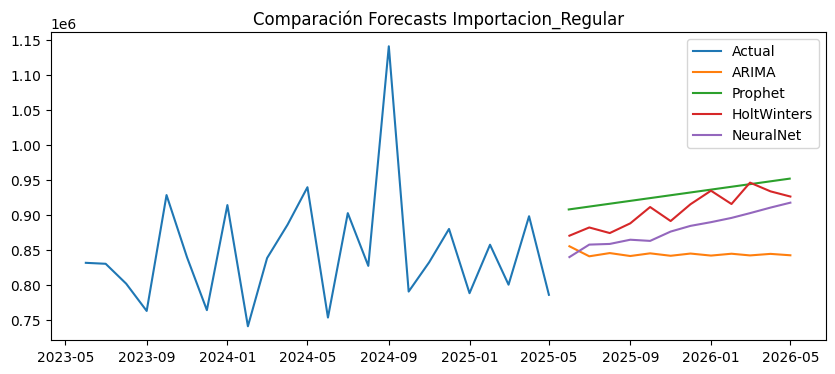


ANÁLISIS DE SERIE: Consumo_Regular
a) Inicio = 2000-01-01 00:00:00   Fin = 2025-05-01 00:00:00   Freq aparente = MS


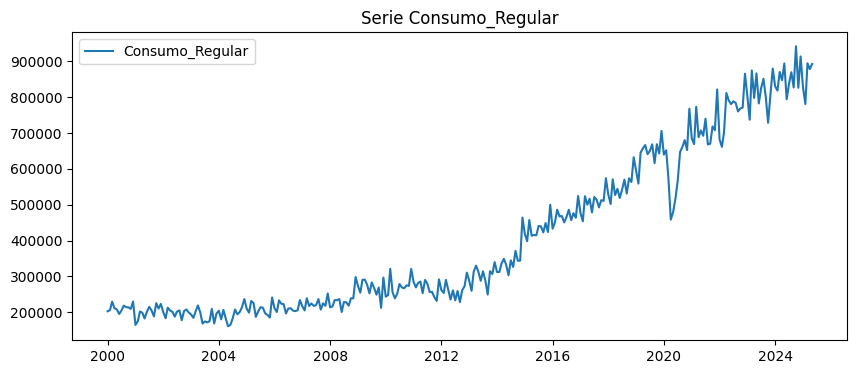

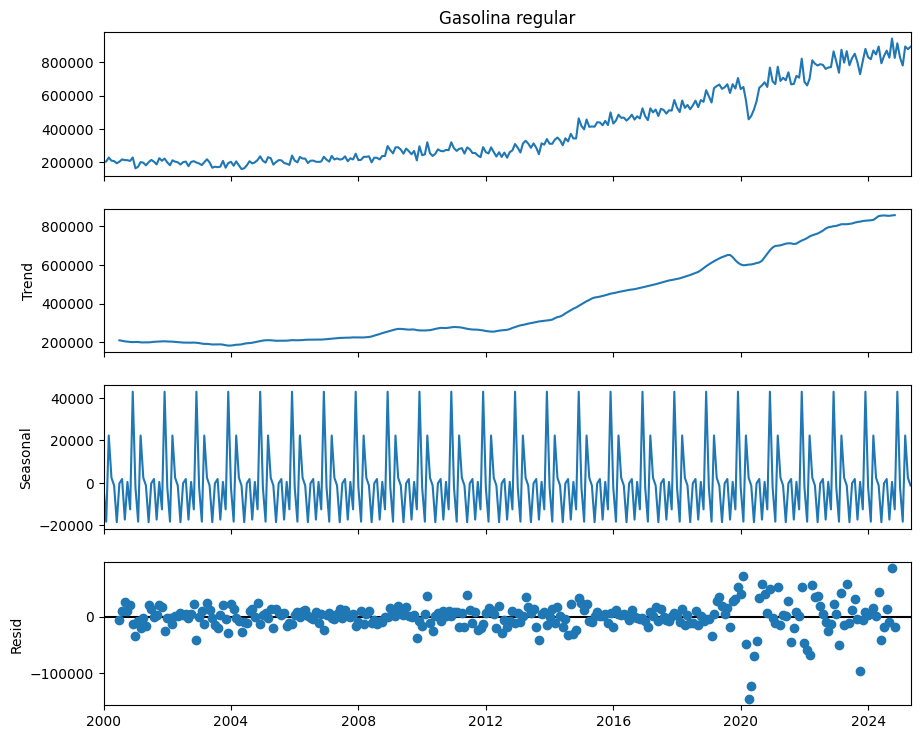

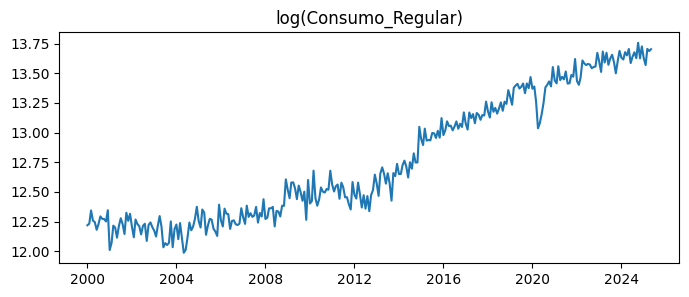

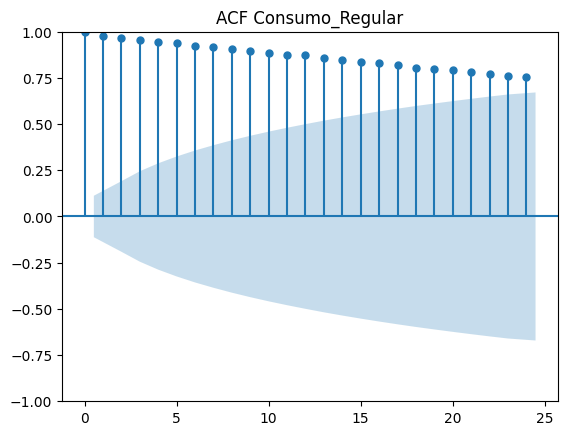

ADF stat=2.292, p-val=0.999
→ No estacionaria en media (d=1 sugerido)

f) Mejor ARIMA order = (3, 1, 3)  AIC = 7128.459083661035


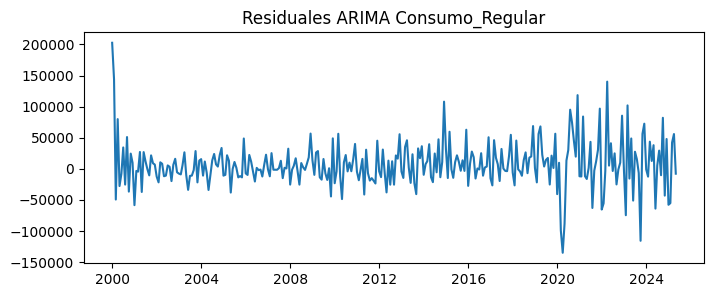

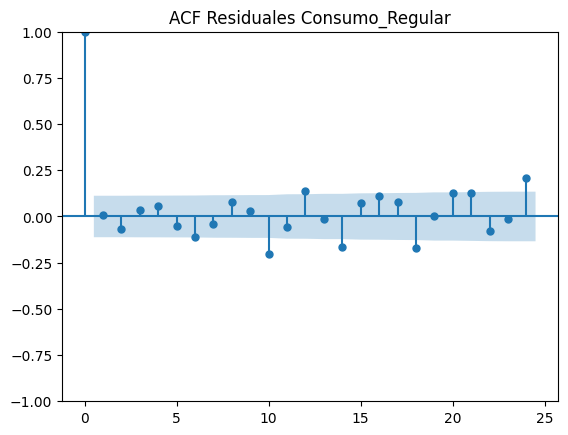

22:30:04 - cmdstanpy - INFO - Chain [1] start processing


                               SARIMAX Results                                
Dep. Variable:       Gasolina regular   No. Observations:                  305
Model:                 ARIMA(3, 1, 3)   Log Likelihood               -3557.230
Date:                Sun, 20 Jul 2025   AIC                           7128.459
Time:                        22:30:04   BIC                           7154.386
Sample:                    01-01-2000   HQIC                          7138.835
                         - 05-01-2025                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.3915      0.102    -13.631      0.000      -1.592      -1.191
ar.L2         -0.4698      0.155     -3.027      0.002      -0.774      -0.166
ar.L3          0.2364      0.085      2.765      0.0

22:30:04 - cmdstanpy - INFO - Chain [1] done processing


h) MSE ARIMA: 1698002068.9035847
   MSE Prophet: 440980056528.6753
   MSE HW: 2555346056.4241176
   MSE NN: 19754825929.192173


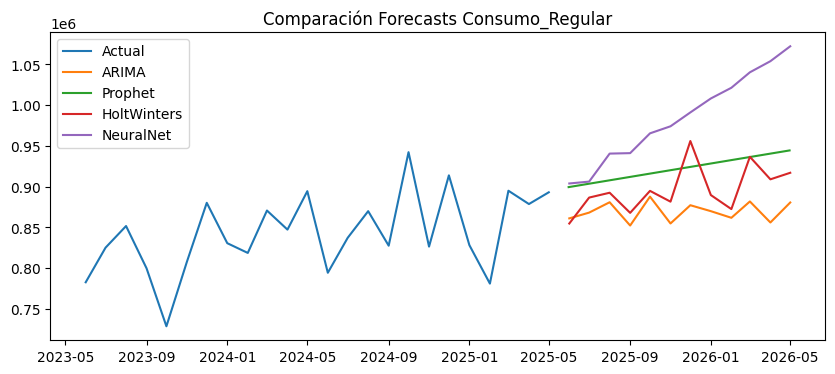

In [45]:
def analizar_serie(name, s, period, forecast_horizon):
    
    print("\n" + "="*40)
    print(f"ANÁLISIS DE SERIE: {name}")
    print("="*40)

    print("a) Inicio =", s.first_valid_index(),
          "  Fin =", s.last_valid_index(),
          "  Freq aparente =", pd.infer_freq(s.index))

    plt.figure(figsize=(10,4))
    plt.plot(s, label=name)
    plt.title(f"Serie {name}")
    plt.legend()
    plt.show()

    dec = seasonal_decompose(s, model='additive', period=period)
    fig = dec.plot()
    fig.set_size_inches(10,8)
    plt.show()

    s_log = np.log(s.dropna())
    plt.figure(figsize=(8,3))
    plt.plot(s_log)
    plt.title(f"log({name})")
    plt.show()

    plot_acf(s.dropna(), lags=period*2)
    plt.title(f"ACF {name}")
    plt.show()

    adf_stat, adf_p, *_ = adfuller(s.dropna())
    print(f"ADF stat={adf_stat:.3f}, p-val={adf_p:.3f}")
    if adf_p>0.05:
        print("→ No estacionaria en media (d=1 sugerido)\n")
    else:
        print("→ Estacionaria en media\n")
    s_clean = s.dropna().astype(float)
    d = 1 if adf_p>0.05 else 0
    best_aic, best_order = np.inf, None
    for p in range(4):
        for q in range(4):
            try:
                m = ARIMA(
                    s_clean,
                    order=(p,d,q),
                    enforce_stationarity=False,
                    enforce_invertibility=False
                ).fit()
                if m.aic < best_aic:
                    best_aic, best_order = m.aic, (p,d,q)
            except:
                continue
    print("f) Mejor ARIMA order =", best_order, " AIC =", best_aic)

    model = ARIMA(s_clean, order=best_order,
                  enforce_stationarity=False,
                  enforce_invertibility=False).fit()
    res = model.resid
    plt.figure(figsize=(8,3))
    plt.plot(res); plt.title(f"Residuales ARIMA {name}"); plt.show()
    plot_acf(res.dropna(), lags=period*2)
    plt.title(f"ACF Residuales {name}"); plt.show()
    print(model.summary())

    dfp = s_clean.reset_index().rename(columns={s_clean.name:'y','Fecha':'ds'}) \
                 if 'Fecha' in s_clean.index.name else s_clean.reset_index().rename(columns={s_clean.name:'y','index':'ds'})
    dfp.columns = ['ds','y']
    mprop = Prophet(yearly_seasonality=(period>50), daily_seasonality=False)
    mprop.fit(dfp)
    fut = mprop.make_future_dataframe(periods=forecast_horizon, freq=s.index.freq or 'M')
    pred_prop = mprop.predict(fut).set_index('ds')['yhat']

    hw = ExponentialSmoothing(
        s_clean, trend='add', seasonal='add', seasonal_periods=period
    ).fit()
    pred_hw = hw.forecast(forecast_horizon)

    lags = 5
    X, y = [], []
    vals = s_clean.values
    for i in range(lags, len(vals)):
        X.append(vals[i-lags:i])
        y.append(vals[i])
    X, y = np.array(X), np.array(y)
    mlp = MLPRegressor(hidden_layer_sizes=(50,), max_iter=1000)
    mlp.fit(X, y)

    last_obs = list(vals[-lags:])
    pred_nn = []
    for _ in range(forecast_horizon):
        p = mlp.predict([last_obs[-lags:]])[0]
        pred_nn.append(p)
        last_obs.append(p)

    freq = pd.infer_freq(s_clean.index)
    if freq is None:
        freq = 'MS' if period == 12 else 'D'

    last_date = s_clean.index[-1]
    try:
        next_start = last_date + pd.tseries.frequencies.to_offset(freq)
    except:
        
        next_start = last_date + pd.DateOffset(months=1) if period==12 else last_date + pd.DateOffset(days=1)

    pred_nn = pd.Series(
        pred_nn,
        index=pd.date_range(start=next_start, periods=forecast_horizon, freq=freq)
    )

    true = s_clean[-forecast_horizon:]
    mse = lambda a,b: mean_squared_error(true, b[:forecast_horizon])
    print("h) MSE ARIMA:", mse(true, model.forecast(forecast_horizon)))
    print("   MSE Prophet:", mse(true, pred_prop))
    print("   MSE HW:", mse(true, pred_hw))
    print("   MSE NN:", mse(true, pred_nn))

    plt.figure(figsize=(10,4))
    plt.plot(s_clean[-forecast_horizon*2:], label='Actual')
    plt.plot(model.forecast(forecast_horizon), label='ARIMA')
    plt.plot(pred_prop[-forecast_horizon:], label='Prophet')
    plt.plot(pred_hw, label='HoltWinters')
    plt.plot(pred_nn, label='NeuralNet')
    plt.legend(); plt.title(f"Comparación Forecasts {name}")
    plt.show()

analizar_serie(
    'Importacion_Regular',
    series['Importacion_Regular'],
    period=12,         
    forecast_horizon=12)

analizar_serie(
    'Consumo_Regular',
    series['Consumo_Regular'],
    period=12,        
    forecast_horizon=12
)
